<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierSeriesWithSound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size='5'><b> Fourier Series with Sound </b></font>

Dr. Bingsen Wang

12/1/2023
</center>

#Python Code
The Python code illustrates the summation of Fourier Series with synchronized sound.  

Moviepy - Building video FourierSeriessound.mp4.
MoviePy - Writing audio in FourierSeriessoundTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video FourierSeriessound.mp4



Moviepy - Done !
Moviepy - video ready FourierSeriessound.mp4


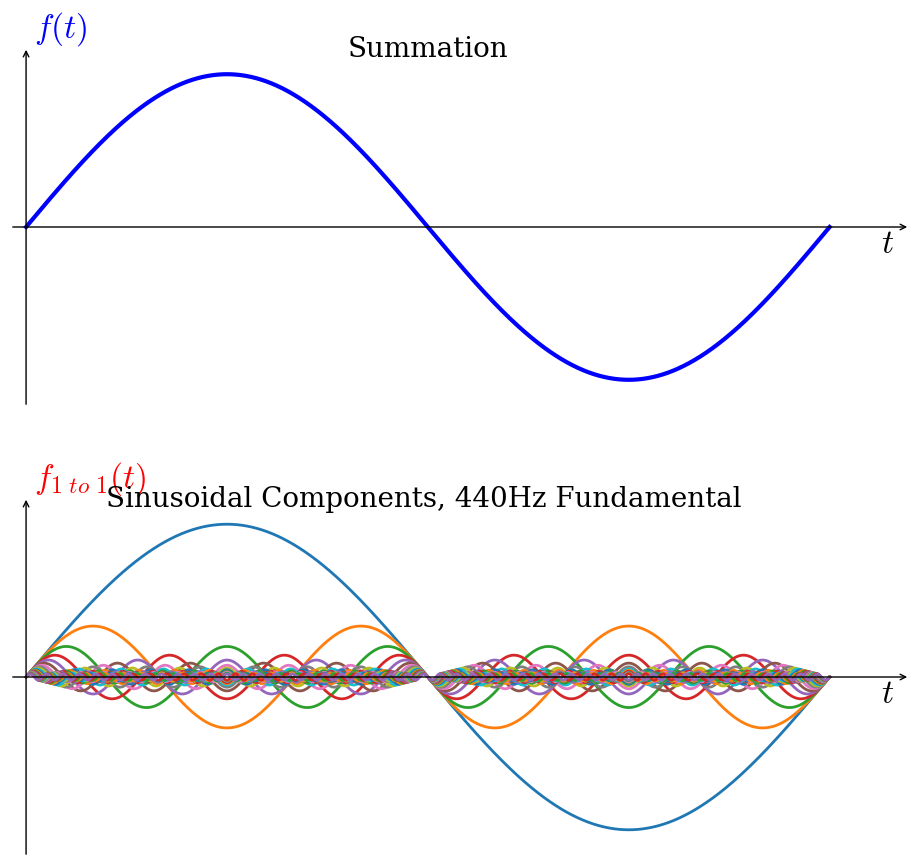

In [12]:
import matplotlib
from scipy.io.wavfile import write
from os import linesep
from moviepy.editor import *
from numpy import linspace,cos,pi,sin,random,int16,array
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def y(A,f,n,t):
  return A*sin(2*pi*n*f*t)

def y_sum(f,nn,t): #sum of odd harmonics, nn: # of harmonics
  yy=0
  for i in range(nn):
    yy += y(4/(pi*(2*i+1)),f,2*i+1,t)
  return yy


#parameters
Nf = 25
sr = 44100 # sampling rate
tpf = 1.0 # time per frame
f1 = 440.0 # fundamental frequency hertz
tsnd=linspace(0,tpf,int(tpf*sr)) #for sound
soundsum = []
for i in range(Nf):
  soundsum.extend(int16(y_sum(f1,i+1,tsnd))*32767)

t=linspace(0,1,2048) #for plots

fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax_frame = [[[0, 0.5, 1, .4], [-.02,1.1], [-1.5,1.5]], #summation
            [[0, 0,   1, .4], [-.02,1.1], [-1.5,1.5]], #harmonics+fundamental
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['$f(t)$', '$t$'],
        [r'$f_{1\ to\ n}(t)$', '$t$'],
        ] #variables for yx axes of each subplot
clst=['b','r'] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  if k==0:
    line_sum = ax.plot([], [],color='b', lw=3)[0]
  else:
    for i in range(Nf):
      lines.append(ax.plot([], [], lw=2)[0]) #lines to plot
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  y_text=ax.text(0.01,ym,ax_lbl[k][0],size=24,va='bottom',color=clst[k]) #y label
ax_lst[0].text(0.5,ax_frame[0][2][1]+0.1,'Summation',va='top',ha='center',size=20)
ax_lst[1].text(0.5,ax_frame[0][2][1]+0.1,'Sinusoidal Components, 440Hz Fundamental ',va='top',ha='center',size=20)
# animation function. This is called sequentially
def animate(i):
  line_sum.set_data(t,y_sum(1,i+1,t))
  lines[i].set_data(t,y(4/(pi*(2*i+1)),1,2*i+1,t))
  y_text.set_text('$f_{1\ to\ '+str(2*i+1)+'}(t)$')
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "FourierSeries"
write(fn+'.wav', sr,array(soundsum))
writervideo = animation.FFMpegWriter(fps=1)
anim.save(fn+'.mp4', writer=writervideo,dpi = 120)
audio1 = AudioFileClip(fn+'.wav')
video = VideoFileClip(fn+'.mp4')
final = video.set_audio(audio1)
final.write_videofile(fn+"sound.mp4",fps=1, codec='mpeg4')
